In [1]:
!pip install --upgrade pyxdf mne pandas jupyterlab ipympl ipywidgets


[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [2]:
import sys
print(sys.version)

3.9.6 (default, Apr 30 2025, 02:07:17) 
[Clang 17.0.0 (clang-1700.0.13.5)]


In [3]:
import matplotlib.pyplot as plt
import mne
import pandas as pd
import os

In [4]:
from src.UnicornData import UnicornData

In [5]:
data_path = '../../data/n400'
data_file = 'n400_maria'

In [6]:
# Possible options:
os.listdir(data_path)

['n400_nani_2.csv',
 'n400_maria.xdf',
 'n400_nani.xdf',
 'n400_nani_2.xdf',
 'n400_maria.csv',
 'n400_nani.csv',
 'n400_luka.csv',
 'n400_luka.xdf']

In [7]:
CONST_OFFSET = 0.073  # Delay measured with photodiode that day

In [8]:
csv_data = pd.read_csv(f'{data_path}/{data_file}.csv')
csv_data.head()

,timestamp_iso,trial_index,prime,target,condition,prime_time_s,isi_s,target_time_s,resp_window_s,resp_key,correct,rt_ms
0,2025-10-23T07:21:37.593,0,კუნძული,ჭრიჭინა,unrelated,0.2,1.010,0.2,1.493,left,1,1087.16
1,2025-10-23T07:21:40.358,1,კაკალი,ნესვი,unrelated,0.2,0.920,0.2,1.595,right,0,941.71
2,2025-10-23T07:21:43.072,2,ხილი,კერვა,unrelated,0.2,1.024,0.2,1.449,left,1,713.44
3,2025-10-23T07:21:45.903,3,მდინარე,წყარო,related,0.2,1.003,0.2,1.574,right,1,987.37
4,2025-10-23T07:21:48.749,4,თიხა,ჯდომა,unrelated,0.2,1.082,0.2,1.535,left,1,1193.90


In [9]:
related_idx = csv_data[csv_data['condition'] == 'related'].index.values
unrelated_idx = csv_data[csv_data['condition'] == 'unrelated'].index.values

In [10]:
related_idx

array([  3,   6,  14,  16,  18,  26,  27,  29,  30,  32,  37,  39,  41,
        43,  46,  53,  57,  58,  60,  62,  63,  67,  68,  69,  70,  72,
        73,  75,  76,  77,  78,  79,  80,  82,  83,  85,  86,  89,  90,
        91,  93,  94,  95,  96,  97,  98,  99, 101, 104, 105, 106, 107,
       111, 112, 114, 115, 116, 117, 118, 119])

In [11]:
unrelated_idx

array([  0,   1,   2,   4,   5,   7,   8,   9,  10,  11,  12,  13,  15,
        17,  19,  20,  21,  22,  23,  24,  25,  28,  31,  33,  34,  35,
        36,  38,  40,  42,  44,  45,  47,  48,  49,  50,  51,  52,  54,
        55,  56,  59,  61,  64,  65,  66,  71,  74,  81,  84,  87,  88,
        92, 100, 102, 103, 108, 109, 110, 113])

In [12]:
data = UnicornData(f'{data_path}/{data_file}.xdf', delay=CONST_OFFSET)
# marker_data, marker_time = data.marker_data, data.marker_time
# eeg_data, eeg_time = data.eeg_data, data.eeg_time

Loading ../../data/n400/n400_maria.xdf
([{'info': defaultdict(<class 'list'>, {'name': ['UN-2024.04.49'], 'type': ['Data'], 'channel_count': ['17'], 'nominal_srate': ['250'], 'channel_format': ['float32'], 'source_id': ['UN-2024.04.49'], 'version': ['1.1000000000000001'], 'created_at': ['62083.775759099997'], 'uid': ['439d82e5-5db2-4bd5-b322-b93bde82d3ed'], 'session_id': ['default'], 'hostname': ['DESKTOP-AA5A767'], 'v4address': [None], 'v4data_port': ['16572'], 'v4service_port': ['16572'], 'v6address': [None], 'v6data_port': ['16572'], 'v6service_port': ['16572'], 'desc': [None], 'stream_id': 1, 'effective_srate': 0, 'segments': [], 'clock_segments': []}), 'footer': {'info': defaultdict(<class 'list'>, {'first_timestamp': ['0'], 'last_timestamp': ['0'], 'sample_count': ['0'], 'clock_offsets': [defaultdict(<class 'list'>, {'offset': [defaultdict(<class 'list'>, {'time': ['63344.70367215'], 'value': ['3.499990270938724e-07']}), defaultdict(<class 'list'>, {'time': ['63349.7043235'], 'va

In [13]:
# Create raw data
raw = data.filter().raw
raw

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 1651 samples (6.604 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband ed

[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished


<RawArray | 8 x 103336 (413.3 s), ~6.3 MB, data loaded>

In [14]:
TARGET_MARKER = 1
RESPONSE_MARKER = 2

In [15]:
picks = ["Fz", "Cz"]
event_dict = dict(target=1)
tmin, tmax = -0.2, 1
epochs = data.create_epochs(picks=picks, event_dict=event_dict, tmin=tmin, tmax=tmax, reject_criteria=None)
epochs

Not setting metadata
120 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 120 events and 301 original time points ...
0 bad epochs dropped


<Epochs | 120 events (all good), -0.2 – 1 s (baseline -0.2 – 0 s), ~577 kB, data loaded,
 'target': 120>

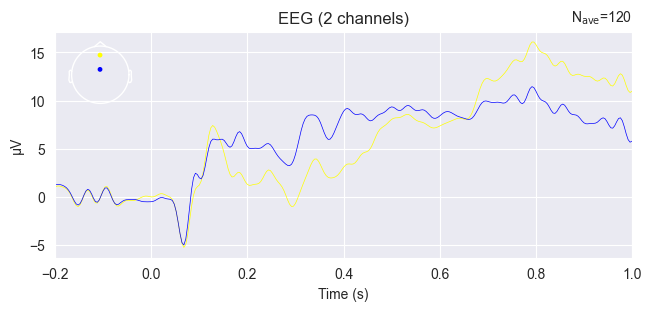

In [16]:
epochs.average().plot(picks=picks)
plt.show()

combining channels using "mean"


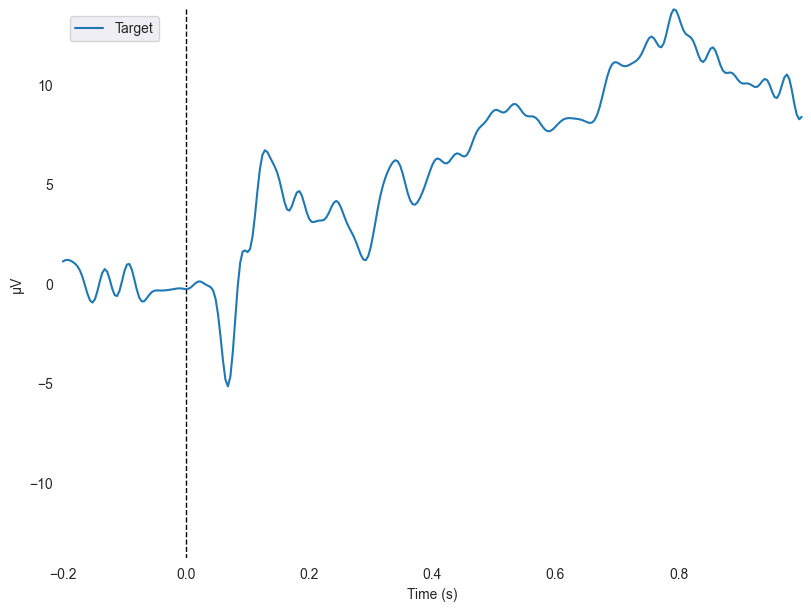

[<Figure size 800x600 with 1 Axes>]

In [17]:
mne.viz.plot_compare_evokeds(
    {"Target": epochs['target'].average()},
    combine='mean',
    show=True
)

In [18]:
related_epochs = epochs[related_idx]
unrelated_epochs = epochs[unrelated_idx]

combining channels using "mean"
combining channels using "mean"


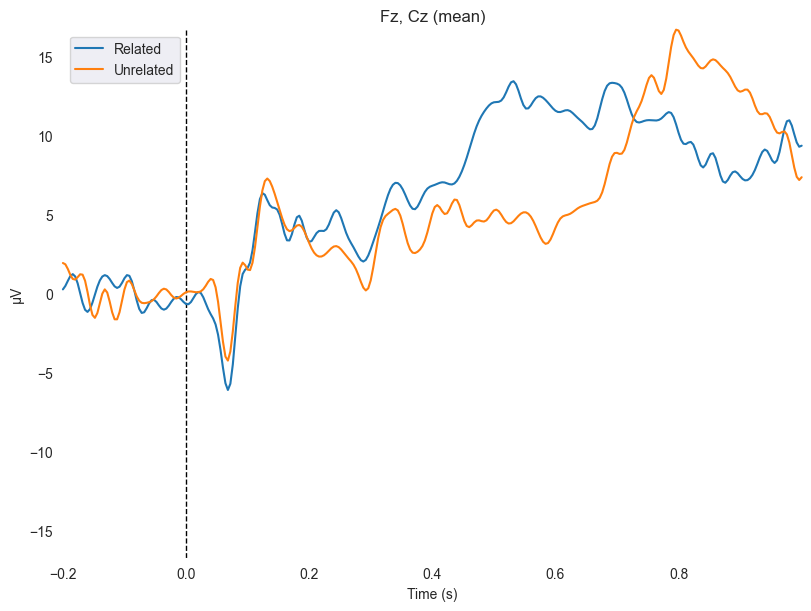

[<Figure size 800x600 with 1 Axes>]

In [19]:
mne.viz.plot_compare_evokeds(
    {"Related": related_epochs.average(), "Unrelated": unrelated_epochs.average()},
    picks=picks,
    combine='mean',
    show=True
)